# Import Library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

plt.style.use('bmh')
sns.set_style({'axes.grid': False})
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head() , test.head()

(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

__Observations:__
* There are a total of 81 variables for train and 80 variables for test
* SalePrice is our target variables

# Data Analysis

In [6]:
merged = pd.concat([train, test], axis=0, sort=True)

In [7]:
merged.dtypes.value_counts()

object     43
int64      26
float64    12
dtype: int64

In [8]:
merged.shape

(2919, 81)

In [9]:
# Extract numerical variables
num_merged = merged.select_dtypes(include=['int64', 'float64'])

In [10]:
num_merged.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,7,0,208500.0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,0,181500.0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,7,0,223500.0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,7,0,140000.0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,8,0,250000.0,0,9,1145.0,192,2000,2000,2008


In [11]:
num_merged.columns.values

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

In [12]:
num_merged.shape

(2919, 38)

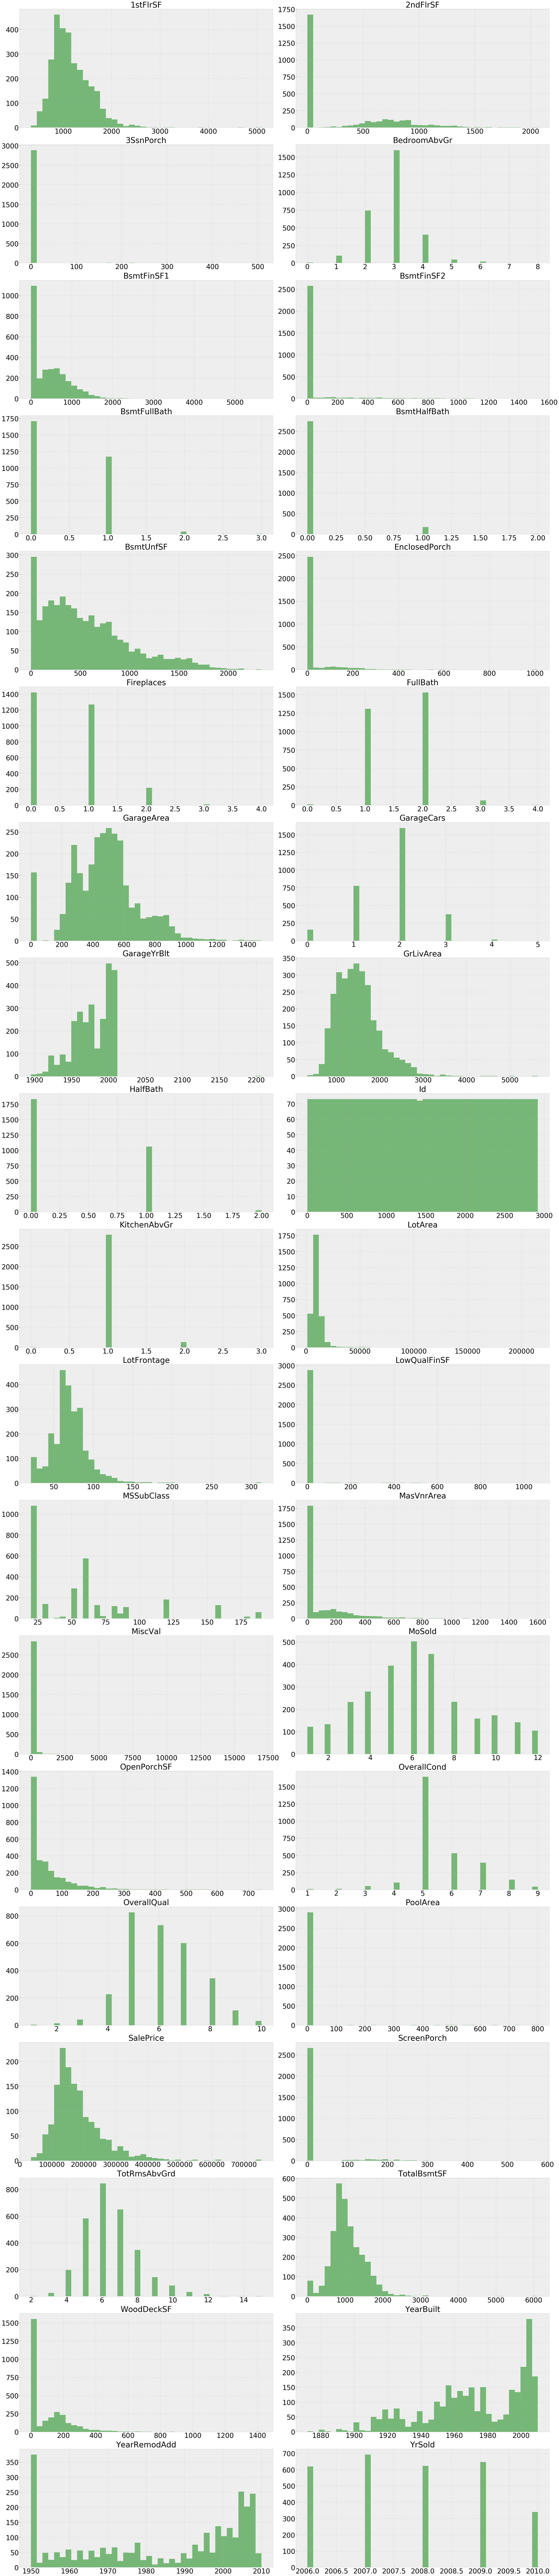

In [13]:
# Plot histogram of numerical values
def draw_histogram(df, variables, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins=40, ax=ax, color='g', alpha=0.5, figsize=(40,200))
        ax.set_title(var_name, fontsize=40)
        ax.tick_params(axis='both', which='major', labelsize=35)
        ax.tick_params(axis='both', which='minor', labelsize=35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95]) #improves appearance
    plt.show

draw_histogram(num_merged, num_merged.columns, 19, 2)

__Observations:__
* There are 5 categorical data in the numerous variable: MSSubClass, OverallQual, OverallCond, MoSold and YrSold. Can be confirmed more with the data_description.txt
* We will convert their type to object instead numerical variable

In [14]:
merged.loc[:, ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:, ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

In [15]:
# Create Function for scatter plot, bar plot, and histogram plot
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(x=x, y=y, mode='markers', marker=dict(color=y, size=size, showscale=True, colorscale=c_scale))
    layout = go.Layout(hovermode='closest', title=title, xaxis=dict(title=xaxis), yaxis=dict(title=yaxis))
    fig = go.Figure(data=[trace], layout=layout)
    return iplot(fig)

def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(x=x, y=y, marker=dict(color=y, colorscale=c_scale))
    layout = go.Layout(hovermode='closest', title=title, yaxis=dict(title=yaxis))
    fig = go.Figure(data=[trace], layout=layout)
    return iplot(fig)

def histogram_plot(x, title, yaxis, color):
    trace = go.Histogram(x=x, marker=dict(color=color))
    layout = go.Layout(hovermode='closest', title=title, yaxis=dict(title=yaxis))
    fig = go.Figure(data=[trace], layout=layout)
    return iplot(fig)

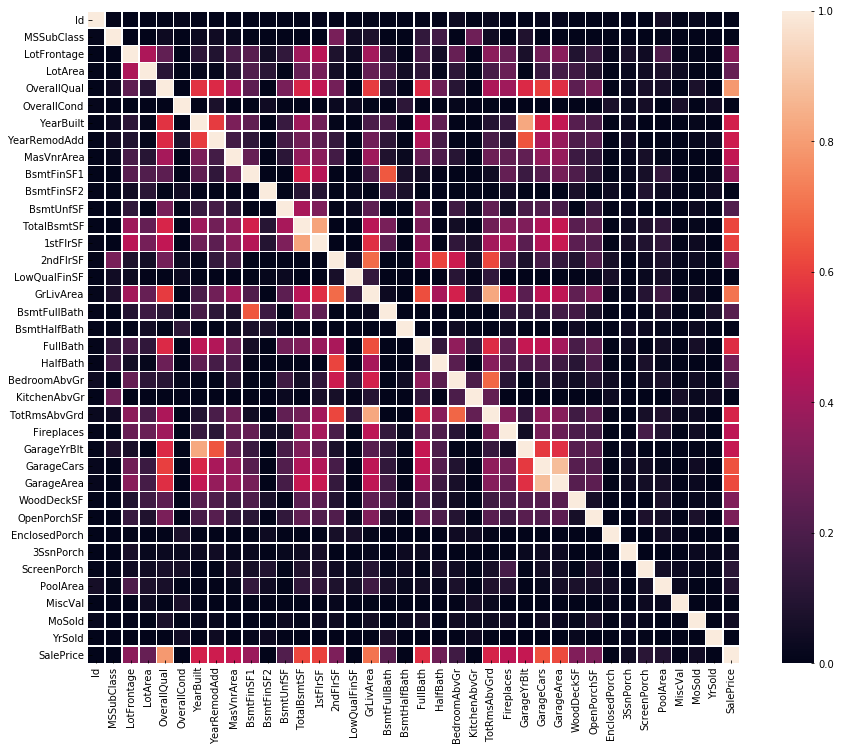

In [16]:
# Checking the correlation matrix
corr = train.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, linewidths=0.5, vmin=0, vmax=1, square=True)

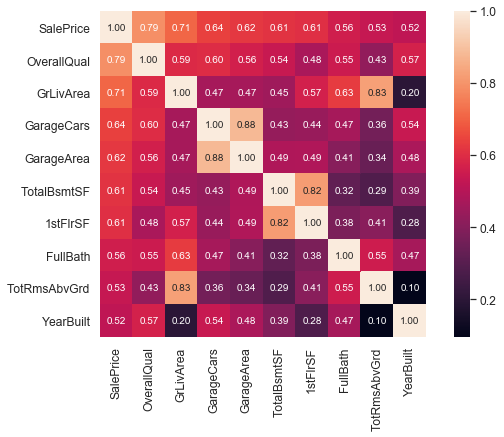

In [17]:
k = 10 # no of heatmap variables
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
plt.figure(figsize=(10,6))
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

__Observations:__
* OverallQual and GrLiveArea are strongly correlated with SalePrice
* GarageCars and GarageArea are strongly correlated with each other. We will use only one of them in our model: GarageCar
* Same with TotalBsmtSF and 1stFlrSF, GrLivArea and TotRmsAbvGrd.

We can conclude that the following variables play an important role:
* OverallQual
* GrLivArea
* GarageCars
* TotalBsmtSF
* FullBath
* YearBuilt

# Feature Engineering

In [18]:
# Scatter plot for GrLivArea vs ScatterPlot
scatter_plot(train.GrLivArea, train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

We can see a linear relationship between GrLivArea and SalePrice. There are some outliers in GrLivArea, let's remove them.

In [19]:
# Drop 
train.drop(train[train.GrLivArea > 4000].index, inplace=True)

In [20]:
train.reset_index(drop=True, inplace=True)

In [21]:
scatter_plot(train.GrLivArea, train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [22]:
# Scatter Plot of TotalBsmtSF vs SalePrice
scatter_plot(train.TotalBsmtSF, train.SalePrice, 'TotalBsmtSF vs SalePrice', 'TotalBsmtSF', 'SalePrice', 10, 'Cividis')

We can also see a linear relationship in this scatter plot. It looks like there's some sale on house with TotalBsmtSF equal to zero. Let's treat the outliers

In [23]:
train.drop(train[train.TotalBsmtSF > 3000].index, inplace=True)
train.reset_index(drop=True, inplace=True)

In [24]:
scatter_plot(train.TotalBsmtSF, train.SalePrice, 'TotalBsmtSF vs SalePrice', 'TotalBsmtSF', 'SalePrice', 10, 'Cividis')

In [25]:
# scatter plot between YearBuilt and SalePrice
scatter_plot(train.YearBuilt, train.SalePrice , 'YearBuilt vs SalePrice', 'YearBuilt', 'SalePrice', 10, 'viridis')

We can also see a linear relationship between these two variables. As the year is passing, sale price of the house also increase

In [26]:
# remove outliers
train.drop(train[train.YearBuilt < 1900].index, inplace=True)
train.reset_index(drop=True, inplace=True)

In [27]:
# Scatter plot between GarageCars and SalePrice
scatter_plot(train.GarageCars, train.SalePrice, 'GarageCars vs SalePrice', 'GarageCars', 'SalePrice', 10, 'Electric')

In [28]:
# Scatter plot between OverallQual and SalePrice
scatter_plot(train.OverallQual, train.SalePrice, 'OverallQual vs SalePrice', 'OverallQual', 'SalePrice', 10, 'Bluered')

In [29]:
# scatter plot between FullBath and SalePrice
scatter_plot(train.FullBath, train.SalePrice, 'FullBath vs SalePrice', 'FullBath', 'SalePrice', 10, 'RdBu')

__Observations:__
* 'GrLivArea' and 'TotalBsmtSF' have a positive linear relation to 'SalePrice'.

## Handling Missing Variables

In [30]:
y_train = train.SalePrice
train.drop('SalePrice', axis=1, inplace=True)
df_merged = pd.concat([train, test], axis = 0)

df_merged.shape, y_train.shape

((2897, 80), (1438,))

In [31]:
df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')
df_merged.dtypes.value_counts()

object     48
int64      21
float64    11
dtype: int64

In [32]:
missing_columns = df_merged.columns[df_merged.isna().any()].values
missing_columns

array(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'], dtype=object)

In [33]:
total_missing_columns = np.count_nonzero(df_merged.isna().sum())
total_missing_columns

34

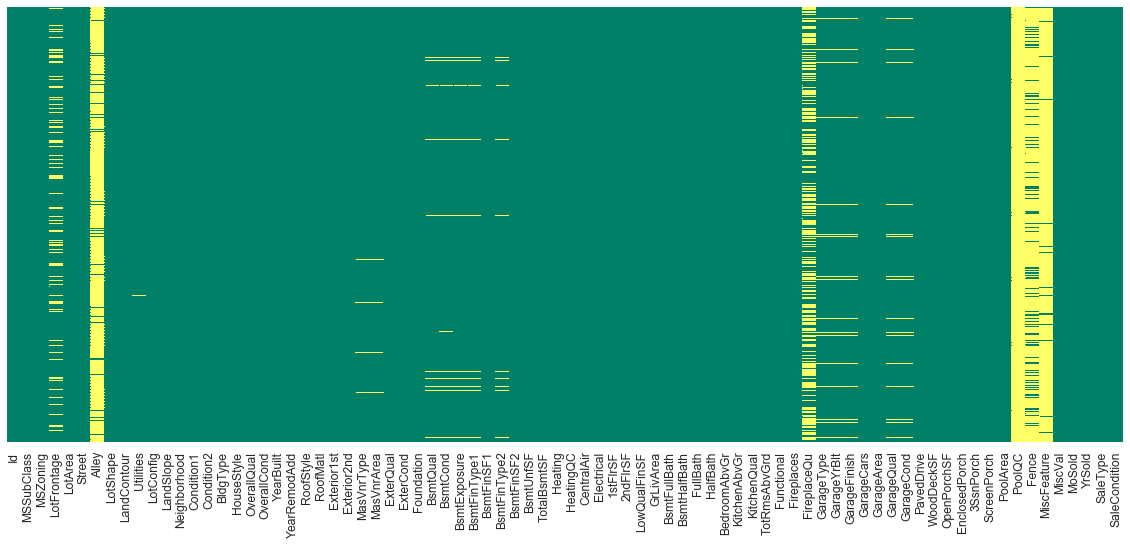

In [34]:
# simple visualization of missing variables
plt.figure(figsize=(20,8))
sns.heatmap(df_merged.isnull(), yticklabels=False, cbar=False, cmap='summer')

In [35]:
# plot the missing features in scatter plot
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()
x= missing_columns.index
y = missing_columns
title = 'Variables with Missing Values'
scatter_plot(x, y, title, '', '# of missing values', 20, 'Viridis')

In [36]:
missing_columns

MSZoning           4
LotFrontage      485
Alley           2705
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      79
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1410
GarageType       155
GarageYrBlt      157
GarageFinish     157
GarageCars         1
GarageArea         1
GarageQual       157
GarageCond       157
PoolQC          2889
Fence           2331
MiscFeature     2793
SaleType           1
dtype: int64

Variables like 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', and 'MiscFeature' has a lot of missing data. However, if we check from the data description, the NaN is indicating that the home does not have that, so we can simply replace the NaN value with 'None' or the equivalent for each columns.

In [37]:
# Impute by None where NaN means not available
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 
                                      'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure',
                                      'BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [38]:
# Impute Categorical Variables with mode
to_impute_by_mode =  df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd',
                                       'KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [39]:
# Impute Discrete and Continuous Variable with median of the variables
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 
                                        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

LotFrontage is not yet imputed because it has quite a lot of missing values (16%). If we simply impute in by mean or median, it might introduce bias. We will need to group our data by correlated variables and find the median from each subset.

In [40]:
df = df_merged.copy()
df.drop(['Id', 'LotFrontage'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = df.apply(le.fit_transform)

df.head(2)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,617,1,1,3,3,0,4,0,...,0,0,3,4,1,0,1,2,8,4
1,0,3,892,1,1,3,3,0,2,0,...,0,0,3,4,1,0,4,1,8,4


In [41]:
 # Inserting LotFrontage in variable correlation.
df['LotFrontage'] = df_merged['LotFrontage']
# Move LotFrontage at index 0.
df = df.set_index('LotFrontage').reset_index()
df.head(2)

,LotFrontage,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,65.0,5,3,617,1,1,3,3,0,4,...,0,0,3,4,1,0,1,2,8,4
1,80.0,0,3,892,1,1,3,3,0,2,...,0,0,3,4,1,0,4,1,8,4


In [42]:
# Correlation
corr = df.corr()
display(corr['LotFrontage'].sort_values(ascending = False)[:5])
display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

LotFrontage    1.000000
LotArea        0.639965
1stFlrSF       0.420257
GarageArea     0.360497
GrLivArea      0.347875
Name: LotFrontage, dtype: float64

LotConfig    -0.191054
GarageType   -0.295651
MSSubClass   -0.398100
BldgType     -0.486039
Utilities          NaN
Name: LotFrontage, dtype: float64

In [43]:
df_merged['LotFrontage'] = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [44]:
df_merged.columns[df_merged.isna().any()].values

array([], dtype=object)

## Normality and Transformation of Distribution

In [45]:
# histogram plot of SalePrice
histogram_plot(y_train, 'SalePrice Histogram', 'SalePrice', 'moccasin')

In [46]:
print("Skewness: %f" % y_train.skew())

Skewness: 1.529700


__Observations:__
* Deviate from normal distribution

In [47]:
y_train = np.log1p(y_train)

In [48]:
title = 'SalePrice after Transformation (skewness: {:0.4f})'.format(y_train.skew())
histogram_plot(y_train, title, 'Frequency', ' deepskyblue')

In [49]:
# Calculate skewness for the rest of the columns
skew_num = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])
skew_num_sorted = skew_num.sort_values(ascending = False, by = 'Skewness')
skew_num_sorted

,Skewness
MiscVal,21.881799
PoolArea,18.653165
LotArea,13.135552
LowQualFinSF,12.515094
3SsnPorch,11.338027
KitchenAbvGr,4.250236
BsmtFinSF2,4.153746
EnclosedPorch,4.066188
ScreenPorch,3.930502
BsmtHalfBath,3.930474


In [50]:
bar_plot(skew_num_sorted.index, skew_num_sorted.Skewness, 'Skewness', 'Skewness', 'Blackbody')

In [51]:
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [52]:
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew() > 0.5].index])

#Normal variables
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew() < 0.5].index]
    
#Merging
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

In [53]:
df_merged_num.skew()[df_merged_num.skew() > 0.5].index

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [54]:
df_merged_num.update(df_merged_num_all)

df_merged_num.shape, y_train.shape

d:\program files\python\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



((2897, 32), (1438,))

## Feature Scaling

In [55]:
# Standarize numeric features with RobustScaler
from sklearn.preprocessing import RobustScaler

In [56]:
scaler = RobustScaler()
scaler.fit(df_merged_num)
df_merged_num_scaled = scaler.transform(df_merged_num)

In [57]:
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)

In [58]:
df_merged_num_scaled.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-1.007539,-0.282415,-0.252720,0.638298,0.256410,1.034716,0.097744,0.0,-0.868727,-0.290107,...,0.615385,0.0,0.267578,0.000000,0.195018,0.000000,0.0,0.0,0.0,0.0
1,-1.006854,0.509600,0.040019,0.063830,-0.435897,0.000000,0.147083,0.0,-0.377642,0.495238,...,-0.076923,0.0,-0.076172,1.111220,-0.773184,0.000000,0.0,0.0,0.0,0.0
2,-1.006169,-0.110504,0.403904,0.595745,0.230769,0.997612,0.041239,0.0,-0.050728,-0.144256,...,0.564103,0.0,0.501953,0.000000,0.109172,0.000000,0.0,0.0,0.0,0.0
3,-1.005483,-0.587089,0.028038,-1.234043,-0.589744,0.000000,-0.081293,0.0,0.117866,-0.541370,...,0.487179,1.0,0.634766,0.000000,0.067489,5.609472,0.0,0.0,0.0,0.0
4,-1.004798,0.696015,0.947867,0.574468,0.179487,1.147836,0.086395,0.0,0.042894,0.298374,...,0.538462,1.0,1.392578,1.025886,0.269036,0.000000,0.0,0.0,0.0,0.0


In [59]:
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [60]:
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

In [61]:
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

In [62]:
df_merged_one_hot = df_merged_cat.select_dtypes(include=['category'])

In [63]:
df_merged_one_hot = pd.get_dummies(df_merged_one_hot, drop_first=True)

In [64]:
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis=1)

In [65]:
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis=1)

In [66]:
df_merged_processed.shape

(2897, 224)

In [67]:
df_train_final = df_merged_processed.iloc[0:1438, :]
df_test_final = df_merged_processed.iloc[1438:, :]

In [68]:
y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1433    12.072547
1434    12.254868
1435    12.493133
1436    11.864469
1437    11.901590
Name: SalePrice, Length: 1438, dtype: float64

In [69]:
df_train_final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,-1.007539,-0.282415,-0.252720,0.638298,0.256410,1.034716,0.097744,0.0,-0.868727,-0.290107,...,4,2,6,0,2,3,3,2,0,0
1,-1.006854,0.509600,0.040019,0.063830,-0.435897,0.000000,0.147083,0.0,-0.377642,0.495238,...,4,1,6,3,2,3,3,2,0,0
2,-1.006169,-0.110504,0.403904,0.595745,0.230769,0.997612,0.041239,0.0,-0.050728,-0.144256,...,4,2,6,3,2,3,3,2,0,0
3,-1.005483,-0.587089,0.028038,-1.234043,-0.589744,0.000000,-0.081293,0.0,0.117866,-0.541370,...,4,2,6,4,1,3,3,2,0,0
4,-1.004798,0.696015,0.947867,0.574468,0.179487,1.147836,0.086395,0.0,0.042894,0.298374,...,4,2,6,3,2,3,3,2,0,0


In [70]:
df_test_final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,-0.006854,0.509600,0.478542,-0.255319,-0.820513,0.000000,0.035531,4.976734,-0.416583,-0.229583,...,4,1,6,0,1,3,3,2,0,3
1,-0.006169,0.557053,0.948993,-0.319149,-0.897436,0.918801,0.138319,0.000000,-0.102165,0.599913,...,4,2,6,0,1,3,3,2,0,0
2,-0.005483,0.211963,0.877618,0.510638,0.128205,0.000000,0.114953,0.000000,-0.938327,-0.126742,...,4,1,6,3,3,3,3,2,0,3
3,-0.004798,0.412911,0.128623,0.531915,0.128205,0.596270,0.073625,0.000000,-0.276105,-0.131106,...,4,2,6,4,3,3,3,2,0,0
4,-0.004112,-1.850496,-1.454234,0.404255,-0.025641,0.000000,-0.051576,0.000000,0.606606,0.523895,...,4,2,6,0,2,3,3,2,0,0


# Model Building and Evaluation

In [71]:
df_train_final.shape, df_test_final.shape, y_train.shape

((1438, 224), (1459, 224), (1438,))

## Model Training

In [72]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [73]:
# set seed
seed = 77

# initialize the model
lr_model = LinearRegression(n_jobs=-1)
lasso_model = Lasso(random_state=seed)
ridge_model = Ridge(random_state=seed)
elnet_model = ElasticNet(random_state=seed)
kr_model = KernelRidge()
dt_model = DecisionTreeRegressor(random_state=seed)
svr_model = SVR()
knn_model = KNeighborsRegressor(n_jobs=-1)
pls_model = PLSRegression()
rf_model = RandomForestRegressor(n_jobs=-1, random_state=seed)
et_model = ExtraTreesRegressor(n_jobs=-1, random_state=seed)
ab_model = AdaBoostRegressor(random_state=seed)
gb_model = GradientBoostingRegressor(random_state=seed)
xgb_model = XGBRegressor(n_jobs=-1, random_state=seed)
lgb_model = LGBMRegressor(n_jobs=-1, random_state=seed)

In [74]:
# Train Models
def train_model(model):
    model.fit(df_train_final, y_train)
    return model.score(df_train_final, y_train)

models = [lr_model, lasso_model, ridge_model, elnet_model, kr_model, dt_model, svr_model,
          knn_model, pls_model, rf_model, et_model, ab_model, gb_model, xgb_model, lgb_model]
model_score = []

for m in models:
    model_score.append(train_model(m))

[19:18:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [92]:
names = [type(m).__name__ for m in models]
scores = pd.DataFrame({"Model": names, "Score": model_score})
scores = scores.sort_values(by='Score', ascending=False).reset_index(drop=True)
# scores = pd.DataFrame(data=model_score, columns=['RSquared'], index=names)
# scores

In [93]:
scores.Score = round(scores.Score * 100, 4)
scores

,Model,Score
0,ExtraTreesRegressor,100.0000
1,DecisionTreeRegressor,100.0000
2,LGBMRegressor,98.8588
3,RandomForestRegressor,97.6829
4,GradientBoostingRegressor,95.7447
5,XGBRegressor,95.0650
6,SVR,94.3882
7,LinearRegression,94.3351
8,Ridge,94.1818
9,PLSRegression,89.3160


In [94]:
scatter_plot(scores.Model, scores.Score, 'Model Score', 'Model Name', 'Score', 20, 'Rainbow')

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def train_test_split_model(model):
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse) #non-negative square-root
    return rmse

model_score = []

for m in models:
    model_score.append(train_test_split_model(m))

[19:40:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [106]:
pd.set_option('float_format', '{:.4f}'.format)
scores = pd.DataFrame({'Model': names, 'Score': model_score})
scores

,Model,Score
0,LinearRegression,158288548946.2338
1,Lasso,0.3952
2,Ridge,0.1205
3,ElasticNet,0.3952
4,KernelRidge,0.2415
5,DecisionTreeRegressor,0.2084
6,SVR,0.1188
7,KNeighborsRegressor,0.1727
8,PLSRegression,0.1248
9,RandomForestRegressor,0.1497


In [130]:
scores.drop(scores[scores['Model']=='LinearRegression'].index, inplace=True)
scores.sort_values(by='Score', ascending=True).reset_index(drop=True)

,Model,Score
0,GradientBoostingRegressor,0.1183
1,SVR,0.1188
2,XGBRegressor,0.1193
3,Ridge,0.1205
4,PLSRegression,0.1248
5,LGBMRegressor,0.1254
6,RandomForestRegressor,0.1497
7,ExtraTreesRegressor,0.1564
8,AdaBoostRegressor,0.1575
9,KNeighborsRegressor,0.1727


## KFold

In [120]:
def cross_validation(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, df_train_final, y_train, cv=10, n_jobs= -1, scoring = 'neg_mean_squared_error')
    sq_val_score = np.sqrt(-1*val_score)
    r_val_score = np.round(sq_val_score, 5)
    return r_val_score.mean()

In [121]:
models = [lasso_model, ridge_model, elnet_model, kr_model, dt_model, svr_model,
          knn_model, pls_model, rf_model, et_model, ab_model, gb_model, xgb_model, lgb_model]
cross_val_scores = []

for m in models:
    cross_val_scores.append(cross_validation(m))

In [123]:
names = [type(m).__name__ for m in models]
cv_score = pd.DataFrame({'Model': names, 'cvScore': cross_val_scores})

,Model,cvScore
0,Lasso,0.3923
1,Ridge,0.1140
2,ElasticNet,0.3923
3,KernelRidge,0.2123
4,DecisionTreeRegressor,0.1962
5,SVR,0.1164
6,KNeighborsRegressor,0.1748
7,PLSRegression,0.1340
8,RandomForestRegressor,0.1455
9,ExtraTreesRegressor,0.1429


In [129]:
cv_score.sort_values(by='cvScore', ascending=True).reset_index(drop=True)

,Model,cvScore
0,Ridge,0.1140
1,SVR,0.1164
2,GradientBoostingRegressor,0.1222
3,LGBMRegressor,0.1228
4,XGBRegressor,0.1230
5,PLSRegression,0.1340
6,ExtraTreesRegressor,0.1429
7,RandomForestRegressor,0.1455
8,AdaBoostRegressor,0.1653
9,KNeighborsRegressor,0.1748


## Hyperparameter Tuning

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
def tune_hyperparameters(model, param_grid):
    global best_params, best_score
    grid = GridSearchCV(model, param_grid, cv = 10, verbose = 1, scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid.fit(df_train_final, y_train)
    best_params = grid.best_params_
    best_score = np.round(np.sqrt(-1 * grid.best_score_), 5)
    return best_params, best_score

In [141]:
ridge_param_grid = {'alpha':[0.5, 2.5, 3.3, 5, 5.5, 7, 9, 9.5, 9.52, 9.64, 9.7, 9.8, 9.9, 10, 10.5,10.62,10.85, 20, 30],
                    'random_state':[seed]}
tune_hyperparameters(ridge_model, ridge_param_grid)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))

Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Ridge best params:{'alpha': 10.62, 'random_state': 77} & best_score:0.11338


[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    0.8s finished


In [143]:
alpha = [0.0001, 0.0002, 0.00025, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 
         0.0004, 0.00045, 0.0005, 0.00055, 0.0006, 0.0008,  0.001, 0.002, 0.005, 0.007, 0.008, 0.01]

lasso_params = {'alpha': alpha,
               'random_state':[seed]}

tune_hyperparameters(lasso_model, lasso_params)
lasso_best_params, lasso_best_score = best_params, best_score
print('Lasso best params:{} & best_score:{:0.5f}' .format(lasso_best_params, lasso_best_score))

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s


Lasso best params:{'alpha': 0.0002, 'random_state': 77} & best_score:0.11243


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.8s finished


In [144]:
KernelRidge_param_grid = {'alpha':[0.1, 0.15, 0.23, 0.25, 0.3,1],
                          'kernel': ['linear', 'polynomial'],
                          'degree': [2,3],
                          'coef0': [1.5,2,3]}
tune_hyperparameters(kr_model, KernelRidge_param_grid)
kr_best_params, kr_best_score = best_params, best_score
print('Kernel Ridge best params:{} & best_score: {:0.5f}'. format(kr_best_params, kr_best_score))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.0s


Kernel Ridge best params:{'alpha': 0.25, 'coef0': 3, 'degree': 2, 'kernel': 'polynomial'} & best_score: 0.11011


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   35.5s finished


In [145]:
elastic_params_grid = {'alpha': [0.0001,0.0002, 0.0003, 0.01,0.1,2], 
                 'l1_ratio': [0.2, 0.85, 0.95,0.98,10],
                 'random_state':[seed]}
tune_hyperparameters(elnet_model, elastic_params_grid)
elastic_best_params, elastic_best_score = best_params, best_score
print('Elastic Net best params:{} & best_score:{:0.5f}' .format(elastic_best_params, elastic_best_score))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.5s


Elastic Net best params:{'alpha': 0.0002, 'l1_ratio': 0.98, 'random_state': 77} & best_score:0.11244


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.9s finished


In [146]:
svr_params_grid = {'kernel':['linear', 'poly', 'rbf'],
                   'C':[2,4,5],
                   'gamma':[0.01,0.001,0.0001]}
tune_hyperparameters(svr_model, svr_params_grid)
svr_best_params, svr_best_score = best_params, best_score
print('SVR best params:{} & best_score:{:0.5f}' .format(svr_best_params, svr_best_score))

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  4.5min finished


SVR best params:{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'} & best_score:0.11307


In [147]:
rf_params_grid = {'n_estimators':[1,5,50,100],
                   'max_depth':[1,2],
                   'min_samples_split':[3,4],
                   'min_samples_leaf':[2,4],
                   'random_state':[seed]}
tune_hyperparameters(rf_model, rf_params_grid)
rf_best_params, rf_best_score = best_params, best_score
print('RF best params:{} & best_score:{:0.5f}' .format(rf_best_params, rf_best_score))

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.2s


RF best params:{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 77} & best_score:0.23120


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   12.8s finished


In [148]:
xgb_params_grid = {'min_child_weight': [5, 10],
                   'gamma': [0.04, 0.1, 1.5],
                   'subsample': [0.6, 0.8, 1.0],
                   'colsample_bytree': [0.46, 1.0],
                   'max_depth': [3, 4]}
xgb_opt = XGBRegressor(learning_rate = 0.03, reg_alpha = 0.4640, reg_lambda = 0.8571, n_estimators = 1000, 
                       silent = 1, nthread = -1, random_state = 101)

tune_hyperparameters(xgb_opt, xgb_params_grid)
xgb_best_params, xgb_best_score = best_params, best_score
print('XGB best params:{} & best_score:{:0.5f}' .format(xgb_best_params, xgb_best_score))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 28.5min finished


XGB best params:{'colsample_bytree': 0.46, 'gamma': 0.04, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} & best_score:0.11530


In [149]:
gb_opt = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = seed)

In [150]:
gb_best_score = cross_validation(gb_opt)

In [151]:
lgb_opt = LGBMRegressor(objective = 'regression', num_leaves = 5,
                              learning_rate=0.05, n_estimators = 660,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)
lgb_best_score = cross_validation(lgb_opt)

In [152]:
# Initialize the model with their best hyperparameter
lasso_opt = Lasso(**lasso_best_params)
ridge_opt = Ridge(**ridge_best_params)
kernel_ridge_opt = KernelRidge(**kr_best_params)
elastic_net_opt = ElasticNet(**elastic_best_params)
rf_opt = RandomForestRegressor(**rf_best_params)
svm_opt = SVR(**svr_best_params)
xgb_opt = XGBRegressor(**xgb_best_params)
gb_opt = gb_opt
lgb_opt = lgb_opt

In [153]:
def predict_with_optimized_models(model):
    model.fit(df_train_final, y_train)
    y_pred = np.expm1(model.predict(df_test_final))
    submission = pd.DataFrame()
    submission['Id']= test.Id
    submission['SalePrice'] = y_pred
    return submission

In [154]:
predict_with_optimized_models(lasso_opt).to_csv('lasso_optimized.csv', index = False)
predict_with_optimized_models(ridge_opt).to_csv('ridge_optimized.csv', index = False)
predict_with_optimized_models(kernel_ridge_opt).to_csv('kernel_ridge_optimized.csv', index = False)
predict_with_optimized_models(elastic_net_opt).to_csv('elastic_net_optimized.csv', index = False)
predict_with_optimized_models(rf_opt).to_csv('rf_opt_optimized.csv', index = False)
predict_with_optimized_models(svm_opt).to_csv('svm_opt_optimized.csv', index = False)
predict_with_optimized_models(xgb_opt).to_csv('xgb_optimized.csv', index = False)
predict_with_optimized_models(gb_opt).to_csv('gb_optimized.csv', index = False)
predict_with_optimized_models(lgb_opt).to_csv('lgb_optimized.csv', index = False)

[22:59:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
